# Changing Image on a Magzine Page

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
path = 'magazine.png'

In [3]:
def plot_cv_img(input_image):
    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.imshow(input_image, cmap = 'gray')
    ax.set_title('Magzine Page')
    ax.axis('off')
    plt.show()

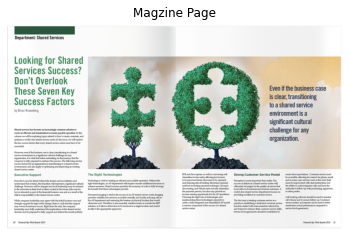

In [4]:
image = cv2.imread(path)
plot_cv_img(image)

### Image Processing

In [5]:
def plot_cv_img(input_image, output_image):
    fig, ax = plt.subplots(nrows=1, ncols=2)
    ax[0].imshow(input_image, cmap = 'gray')
    ax[0].set_title('Target Image')
    ax[0].axis('off')
    ax[1].imshow(output_image, cmap = 'gray')
    ax[1].set_title('My Image')
    ax[1].axis('off')
    plt.show()

Defining image to be swapped (i.e. imageTarget) and the image which will swap the existing image (i.e. myimg)

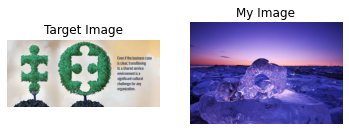

In [6]:
# cap = cv2.VideoCapture(0)
cap = cv2.imread('magazine.png')
imageTarget = cv2.imread('target.png')
myimg = cv2.imread('my_image.jpg')
myimg = cv2.cvtColor(myimg, cv2.COLOR_BGR2RGB)
plot_cv_img(imageTarget, myimg)



Resizing the myimg to the resolution of imageTarget

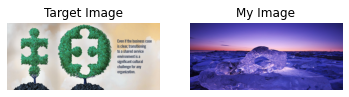

In [7]:
hT, wT, cT = imageTarget.shape
myimg_r = cv2.resize(myimg, (wT, hT))
plot_cv_img(imageTarget, myimg_r)

When using webcam for the fetching the magzine input, remove the comments from the cell below 

In [8]:
# if using webcam
# while True:
#     # _, imgWebcam = cap.read() # when webcam used
#     imgWebcam = cv2.imread('magazine.png')
#     cv2.imshow('target', imageTarget)
#     cv2.imshow('my_image', myimg)
#     cv2.imshow('webcam', imgWebcam)
#     cv2.waitKey(0)   


In [9]:
def plot_cv_img(input_image, output_image1, output_image2):
    fig, ax = plt.subplots(nrows=1, ncols=3)
    ax[0].imshow(input_image, cmap = 'gray')
    ax[0].set_title('Target Image')
    ax[0].axis('off')
    ax[1].imshow(output_image1, cmap = 'gray')
    ax[1].set_title('My Image')
    ax[1].axis('off')
    ax[2].imshow(output_image2, cmap = 'gray')
    ax[2].set_title('Webcam')
    ax[2].axis('off')
    plt.show()

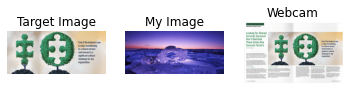

In [10]:
imgWebcam = cv2.imread('magazine.png')
plot_cv_img(imageTarget, myimg_r, imgWebcam)

## Feature Detection

In [11]:
def plot_cv_img(input_image):
    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.imshow(input_image, cmap = 'gray')
    ax.set_title('Target Image with keypoints')
    ax.axis('off')
    plt.show()

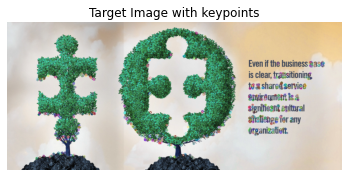

In [12]:
orb = cv2.ORB_create(nfeatures = 1000)
kp1, des1 = orb.detectAndCompute(imageTarget, None)
imageTarget = cv2.drawKeypoints(imageTarget, kp1, None)
plot_cv_img(imageTarget)

In [13]:
def plot_cv_img(input_image):
    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.imshow(input_image, cmap = 'gray')
    ax.set_title('Magzine Page with Keypoints')
    ax.axis('off')
    plt.show()

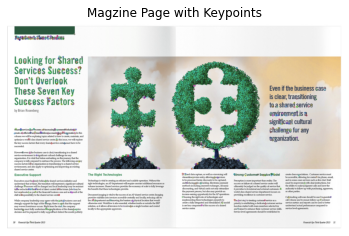

In [14]:
kp2, des2 = orb.detectAndCompute(imgWebcam, None)
imgWebcam = cv2.drawKeypoints(imgWebcam, kp2, None)
plot_cv_img(imgWebcam)


## Feature Matching

In [15]:
def plot_cv_img(input_image):
    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.imshow(input_image, cmap = 'gray')
    ax.set_title('Fetaure Matching')
    ax.axis('off')
    plt.show()

No of feature match: 196


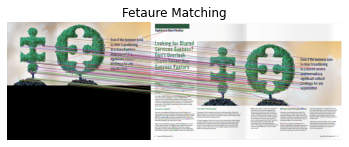

In [16]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)
good = []
for m,n in matches:
    if m.distance < 0.75 * n.distance:
        good.append(m)
print("No of feature match:",len(good))
imgFeatures = cv2.drawMatches(imageTarget, kp1, imgWebcam, kp2, good, None, flags=2)
plot_cv_img(imgFeatures)

## Image Outline, Image Warping, Image Argumentation

In [17]:
def plot_cv_img_ot(input_image):
    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.imshow(input_image, cmap = 'gray')
    ax.set_title('Outline Image')
    ax.axis('off')
    plt.show()

In [18]:
def plot_cv_img_warp(input_image):
    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.imshow(input_image, cmap = 'gray')
    ax.set_title('Warped Image')
    ax.axis('off')
    plt.show()

In [19]:
def plot_cv_img_mask(input_image):
    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.imshow(input_image, cmap = 'gray')
    ax.set_title('Mask')
    ax.axis('off')
    plt.show()

In [20]:
def plot_cv_img_augmask(input_image):
    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.imshow(input_image, cmap = 'gray')
    ax.set_title('Argumented Mask')
    ax.axis('off')
    plt.show()

In [21]:
def plot_cv_img_aug(input_image):
    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.imshow(input_image, cmap = 'gray')
    ax.set_title('Argumented Image')
    ax.axis('off')
    plt.show()

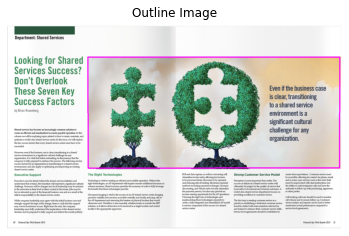

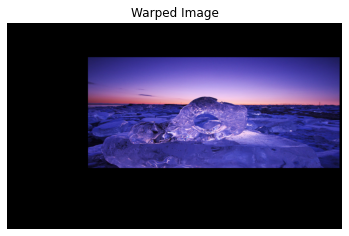

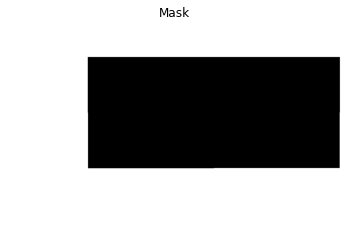

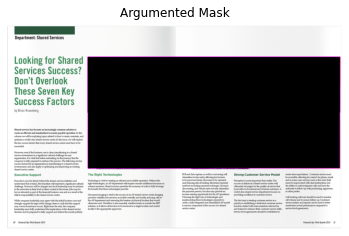

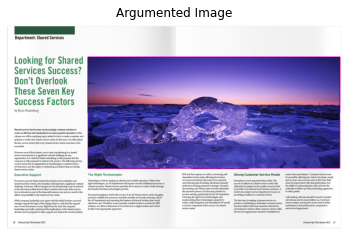

In [22]:
if len(good) > 20:
    srcPts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
    dstPts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)
    matrix, mask = cv2.findHomography(srcPts, dstPts, cv2.RANSAC, 5)
    
    # print(matrix)
    
    pts = np.float32([[0, 0], [0, hT], [wT, hT], [wT, 0]]).reshape(-1, 1, 2)
    dst = cv2.perspectiveTransform(pts, matrix)
    img2 = cv2.polylines(image, [np.int32(dst)], True, (255,0,255), 3)
    plot_cv_img_ot(img2)

    imgWarp = cv2.warpPerspective(myimg_r, matrix, (imgWebcam.shape[1], imgWebcam.shape[0]))
    plot_cv_img_warp(imgWarp)

    maskNew = np.zeros((imgWebcam.shape[0], imgWebcam.shape[1]), np.uint8)
    cv2.fillPoly(maskNew, [np.int32(dst)], (255, 255, 255))

    maskInv = cv2.bitwise_not(maskNew)
    plot_cv_img_mask(maskInv)

    imageAug = image
    imageAug = cv2.bitwise_and(imageAug, imageAug, mask=maskInv)
    plot_cv_img_augmask(imageAug)

    imgAug = cv2.bitwise_or(imgWarp, imageAug)

    plot_cv_img_aug(imgAug)

# Billboard Image Replacement

In [23]:
def plot_cv_img_soc(input_image):
    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.imshow(input_image, cmap = 'gray')
    ax.set_title('Billboard in Soccer Game')
    ax.axis('off')
    plt.show()

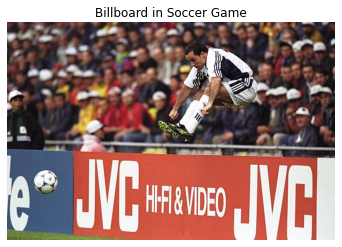

In [24]:
image = cv2.imread('soccer-2.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plot_cv_img_soc(image)

### Data Processing

In [25]:
def plot_cv_img(input_image, output_image):
    fig, ax = plt.subplots(nrows=1, ncols=2)
    ax[0].imshow(input_image, cmap = 'gray')
    ax[0].set_title('Target Image')
    ax[0].axis('off')
    ax[1].imshow(output_image, cmap = 'gray')
    ax[1].set_title('My Image')
    ax[1].axis('off')
    plt.show()

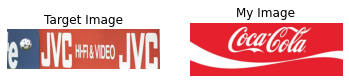

In [26]:
cap = cv2.imread('soccer-2.png')
billTarget = cv2.imread('JVC.png')
billTarget = cv2.cvtColor(billTarget, cv2.COLOR_BGR2RGB)
myimg = cv2.imread('coca-cola.jpg')
myimg = cv2.cvtColor(myimg, cv2.COLOR_BGR2RGB)
plot_cv_img(billTarget, myimg)

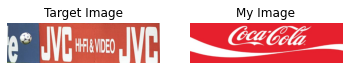

In [27]:
hT, wT, cT = billTarget.shape
myimg_r = cv2.resize(myimg, (wT, hT))
plot_cv_img(billTarget, myimg_r)

In [28]:
def plot_cv_img(input_image, output_image1, output_image2):
    fig, ax = plt.subplots(nrows=1, ncols=3)
    ax[0].imshow(input_image, cmap = 'gray')
    ax[0].set_title('Target Image')
    ax[0].axis('off')
    ax[1].imshow(output_image1, cmap = 'gray')
    ax[1].set_title('My Image')
    ax[1].axis('off')
    ax[2].imshow(output_image2, cmap = 'gray')
    ax[2].set_title('Webcam')
    ax[2].axis('off')
    plt.show()

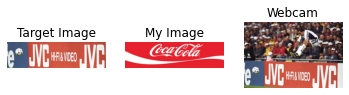

In [29]:
imgWebcam = image
plot_cv_img(billTarget, myimg_r, imgWebcam)

## Feature Detection

In [30]:
def plot_cv_img(input_image):
    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.imshow(input_image, cmap = 'gray')
    ax.set_title('Target Image with keypoints')
    ax.axis('off')
    plt.show()

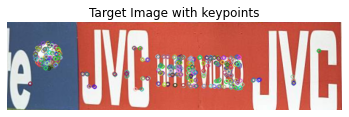

In [31]:
orb = cv2.ORB_create(nfeatures = 1000)
kp1, des1 = orb.detectAndCompute(billTarget, None)
billTarget = cv2.drawKeypoints(billTarget, kp1, None)
plot_cv_img(billTarget)

In [32]:
def plot_cv_img(input_image):
    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.imshow(input_image, cmap = 'gray')
    ax.set_title('Stadium with Keypoints')
    ax.axis('off')
    plt.show()

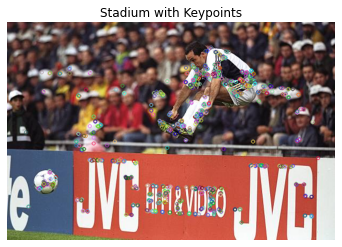

In [33]:
kp2, des2 = orb.detectAndCompute(imgWebcam, None)
imgWebcam = cv2.drawKeypoints(imgWebcam, kp2, None)
plot_cv_img(imgWebcam)

## Feature Matching

In [34]:
def plot_cv_img(input_image):
    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.imshow(input_image, cmap = 'gray')
    ax.set_title('Fetaure Matching')
    ax.axis('off')
    plt.show()

No of feature match: 110


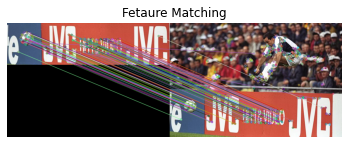

In [35]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)
good = []
for m,n in matches:
    if m.distance < 0.75 * n.distance:
        good.append(m)
print("No of feature match:",len(good))
imgFeatures = cv2.drawMatches(billTarget, kp1, imgWebcam, kp2, good, None, flags=2)
plot_cv_img(imgFeatures)

## Image Outline, Image Warping, Image Argumentation

In [36]:
def plot_cv_img_ot(input_image):
    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.imshow(input_image, cmap = 'gray')
    ax.set_title('Outline Image')
    ax.axis('off')
    plt.show()

def plot_cv_img_warp(input_image):
    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.imshow(input_image, cmap = 'gray')
    ax.set_title('Warped Image')
    ax.axis('off')
    plt.show()

def plot_cv_img_mask(input_image):
    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.imshow(input_image, cmap = 'gray')
    ax.set_title('Mask')
    ax.axis('off')
    plt.show()

def plot_cv_img_augmask(input_image):
    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.imshow(input_image, cmap = 'gray')
    ax.set_title('Argumented Mask')
    ax.axis('off')
    plt.show()

def plot_cv_img_aug(input_image):
    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.imshow(input_image, cmap = 'gray')
    ax.set_title('Argumented Image')
    ax.axis('off')
    plt.show()

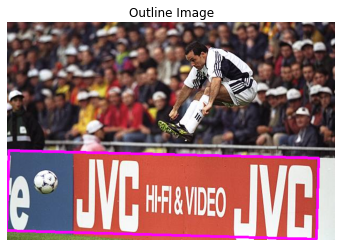

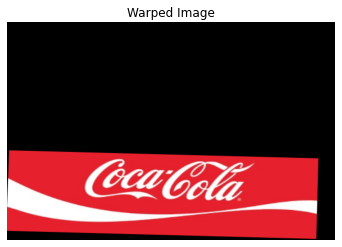

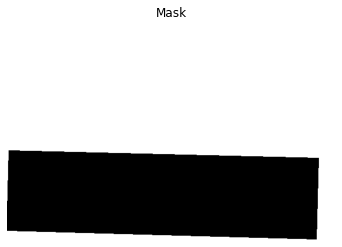

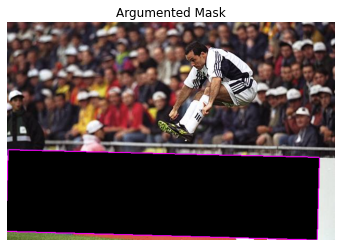

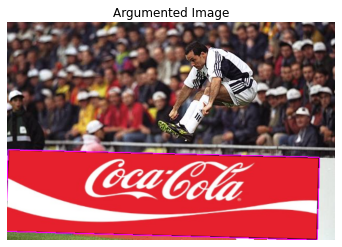

In [37]:
if len(good) > 20:
    srcPts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
    dstPts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)
    matrix, mask = cv2.findHomography(srcPts, dstPts, cv2.RANSAC, 5)
    
    # print(matrix)
    
    pts = np.float32([[0, 0], [0, hT], [wT, hT], [wT, 0]]).reshape(-1, 1, 2)
    dst = cv2.perspectiveTransform(pts, matrix)
    img2 = cv2.polylines(image, [np.int32(dst)], True, (255,0,255), 3)
    plot_cv_img_ot(img2)

    imgWarp = cv2.warpPerspective(myimg_r, matrix, (imgWebcam.shape[1], imgWebcam.shape[0]))
    plot_cv_img_warp(imgWarp)

    maskNew = np.zeros((imgWebcam.shape[0], imgWebcam.shape[1]), np.uint8)
    cv2.fillPoly(maskNew, [np.int32(dst)], (255, 255, 255))

    maskInv = cv2.bitwise_not(maskNew)
    plot_cv_img_mask(maskInv)

    imageAug = image
    imageAug = cv2.bitwise_and(imageAug, imageAug, mask=maskInv)
    plot_cv_img_augmask(imageAug)

    imgAug = cv2.bitwise_or(imgWarp, imageAug)

    plot_cv_img_aug(imgAug)

# Performance Analysis of different matching methods

In [38]:
target = cv2.imread('target.png')
target = cv2.cvtColor(target, cv2.COLOR_BGR2RGB)
webcam = cv2.imread('magazine.png')
webcam = cv2.cvtColor(webcam, cv2.COLOR_BGR2RGB)

### ORB

In [39]:
def plot_cv_img(input_image):
    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.imshow(input_image, cmap = 'gray')
    ax.set_title('Fetaure Matching')
    ax.axis('off')
    plt.show()

No of feature match: 194


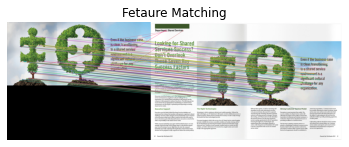

In [40]:
orb = cv2.ORB_create(nfeatures = 1000)
kp1, des1 = orb.detectAndCompute(target, None)
kp2, des2 = orb.detectAndCompute(webcam, None)
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)
good_orb = []
for m,n in matches:
    if m.distance < 0.75 * n.distance:
        good_orb.append(m)
print("No of feature match:",len(good_orb))
features = cv2.drawMatches(target, kp1, webcam, kp2, good_orb, None, flags=2)
plot_cv_img(features)

## SIFT

No of feature match: 4738


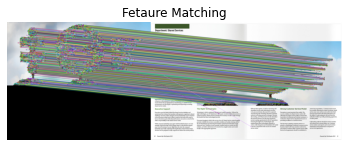

In [41]:
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(target,None)
kp2, des2 = sift.detectAndCompute(webcam,None)
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)
good_sift = []
for m,n in matches:
    if m.distance < 0.75 * n.distance:
        good_sift.append(m)
print("No of feature match:",len(good_sift))
features = cv2.drawMatches(target, kp1, webcam, kp2, good_sift, None, flags=2)
plot_cv_img(features)

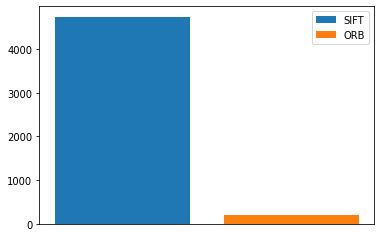

In [42]:
plt.bar(1, len(good_sift), label="SIFT")
plt.bar(2, len(good_orb), label = "ORB")
plt.legend()
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
plt.show()

SIFT have a lot of matched featureswhen compared to ORB but have a longer execution time. So, for this problem that many features are not required